## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateMouse = study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]).any()
#duplicateMouse

duplicates = study_data_complete["Mouse ID"].value_counts()
duplicates = pd.DataFrame(duplicates)
duplicates = duplicates.rename(columns={'Mouse ID' : 'Counts of Mouse ID'})
duplicates.head()

,Counts of Mouse ID
g989,13
m957,10
k894,10
o562,10
j119,10


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
study_data = study_data_complete.set_index('Mouse ID')
study_data.head()

# check the mouse data for ID
g989 = study_data.loc["g989",:]
g989


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.reset_index()
study_data = study_data.drop_duplicates()
study_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(study_data['Mouse ID'].unique())

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen
tumor_volume = study_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
tumor_volume
# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
MeanTumorVolume = tumor_volume.mean()



# variable to hold median Tumor Volume Data Grouped by Drug Regimen

MedianTumorVolume = tumor_volume.median()

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen

VarianceTumorVolume = tumor_volume.var()


# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen

StDevTumorVolume = tumor_volume.std()


# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen

StErrTumorVolume = tumor_volume.sem()

# Convert to DataFrame
drug_tumor_df = pd.DataFrame({
    "Mean Tumor Volume": MeanTumorVolume,
    "Median Tumor Volume": MedianTumorVolume,
    "Tumor Volume Variance": VarianceTumorVolume,
    "Tumor Volume Std.Dev": StDevTumorVolume,
    "Tumor Volume SEM": StErrTumorVolume
})


# Preview DataFrame
drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_df = study_data.groupby('Drug Regimen').agg(
    MeanTumorVolume = ('Tumor Volume (mm3)', np.mean),
    MedianTumorVolume = ('Tumor Volume (mm3)',np.median),
    VarianceTumorVolume = ('Tumor Volume (mm3)',np.var),
    StDevTumorVolume = ('Tumor Volume (mm3)',np.std),
    StErrTumorVolume = ('Tumor Volume (mm3)',st.sem)
)
drug_tumor_df  


,MeanTumorVolume,MedianTumorVolume,VarianceTumorVolume,StDevTumorVolume,StErrTumorVolume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens
Drugs = drug_tumor_df.index.tolist()
# drug regimen as x-axis values for plotting
x_axis = len(Drugs)
# drop all duplicate mice
Bar_Tumor_data = study_data.drop_duplicates('Mouse ID')

# get mice counts per drug
Mouse_tumors = Bar_Tumor_data.groupby('Drug Regimen')
bar_mouse_tumors = Mouse_tumors['Mouse ID'].nunique()
Bar_Tumor_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


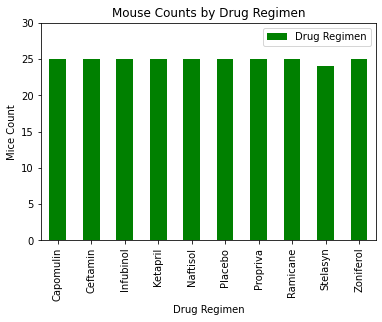

In [11]:
# plot the mouse counts for each drug using pandas
bar_mouse_tumors.plot(kind='bar', x=bar_mouse_tumors, 
                      y=Mouse_tumors, color='green', ylim=(0,30))
plt.title("Mouse Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.legend(["Drug Regimen"], loc='best')
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, Drugs, rotation=90)
#tick_locations.set_xticks("Ramicane", "Infubinol", "Naftisol", " Placebo", "Capomulin", "Zoniferol", "Ketapril", "Propriva", "Ceftamin", "Stelasyn")
plt.show()


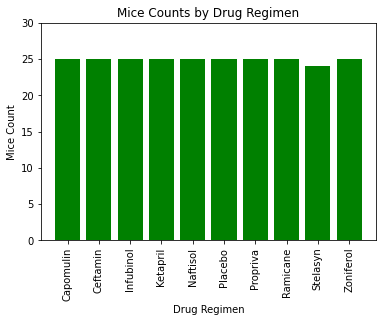

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
Drug_date = bar_mouse_tumors
x_axis = np.arange(len(Drug_date))

plt.bar(x_axis, Drug_date, color='green', alpha=1.0, align="center")

#fig, ax =plt.subplots()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drugs, rotation=90)
#ax.set_xticklabels("Ramicane", "Infubinol", "Naftisol",
#                       " Placebo", "Capomulin", "Zoniferol",
#                       "Ketapril", "Propriva", "Ceftamin", "Stelasyn")

plt.xlim(-0.85, len(x_axis)-0.15)
plt.ylim(0, max(Drug_date)+5)

plt.title("Mice Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

plt.show()


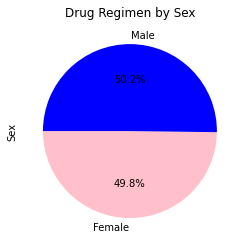

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(Bar_Tumor_data.groupby(['Sex']).count())
gender_df = gender_df.reset_index()
gender_df = gender_df[['Sex','Drug Regimen']]


#Generate a pie chart
 
labels = gender_df['Sex']
sizes = gender_df['Drug Regimen']
colors = ['pink', 'blue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=180)

plt.title("Drug Regimen by Sex")
plt.ylabel("Sex")

plt.show()


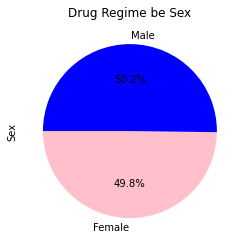

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Mouse_pie = gender_df.plot(kind="pie", y='Drug Regimen',autopct="%1.1f%%", startangle=180,
                          labels=gender_df['Sex'], legend=False, title="Drug Regime be Sex",
                          colors=['pink','blue'])
#more sassy that the former
Mouse_pie.set_ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
QOB_Data = study_data_complete.set_index('Drug Regimen')
FinalFour = QOB_Data.drop(['Ketapril', 'Naftisol','Placebo','Propriva','Stelasyn','Zoniferol'])

# isolated view of just capomulin for later use
IsoCapomulin = FinalFour.loc['Capomulin', :]

# Reset index so drug regimen column persists after inner merge
FinalFour = FinalFour.reset_index()
#study_data

Merge_data = FinalFour.merge(study_data, on=["Mouse ID", "Timepoint"], how="inner")

# get mouse count per drug

Mice_group = FinalFour.groupby('Mouse ID')
Mice_count = Mice_group['Timepoint'].unique()

# Start by getting the last (greatest) timepoint for each mouse

Time_group = Merge_data.groupby(['Mouse ID'])["Timepoint"].max()
Time_greatest = pd.DataFrame(Time_group)
Time_greatest.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [19]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Time_greatest = Time_greatest.reset_index()
merged_df = Time_greatest.merge(study_data, how="left")

# Rearrange order of columns
merged_df = merged_df[["Mouse ID", "Drug Regimen", "Timepoint", 
                       "Tumor Volume (mm3)", "Metastatic Sites", "Sex", "Age_months", "Weight (g)"]]
# Sort order of data frame by timepoint
merged_df = merged_df.sort_values("Timepoint")

# Set index to Mouse ID
merged_df = merged_df.set_index("Mouse ID")

# Set to display all rows
pd.set_option('display.max_rows', None)

# show all rows of data
merged_df

,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
t573,Ceftamin,0,45.000000,0,Female,15,27
u153,Ceftamin,0,45.000000,0,Female,11,25
x226,Ceftamin,0,45.000000,0,Male,23,28
b447,Ceftamin,0,45.000000,0,Male,2,30
v339,Infubinol,5,46.250112,0,Male,20,26
m756,Infubinol,5,47.010364,1,Male,19,30
h531,Ceftamin,5,47.784682,0,Male,5,27
w678,Ramicane,5,43.166373,0,Female,5,24
c326,Infubinol,5,36.321346,0,Female,18,25


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Volume_List = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The median of Tumor Volume is: {quartiles[0.5]} ")

# Locate the rows which contain mice on each drug and get the highest tumor volumes
drugs_df = pd.DataFrame(merged_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].max())
drugs_df = drugs_df.loc[treatments]
Tumor_Volume_List = (drugs_df["Tumor Volume (mm3)"].tolist())

The lower quartile of Tumor Volume is: 37.187743802499995
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 22.74251795250001
The median of Tumor Volume is: 45.0 


In [23]:
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [ ]:
# add subset 


# tumor volumes for each Drug Regimen


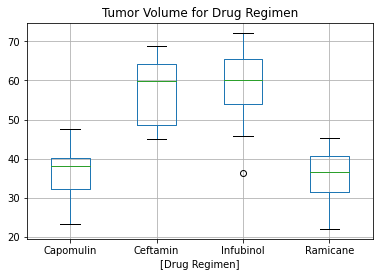

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = merged_df.boxplot(column=["Tumor Volume (mm3)"], by=["Drug Regimen"])
plt.suptitle("")
plt.title("Tumor Volume for Drug Regimen")
plt.show()

## Line and Scatter Plots

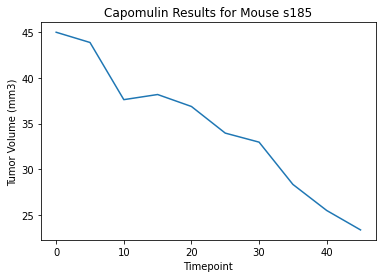

In [28]:
# Generate a line plot of tumor volume vs. time point for mouse s185 treated with Capomulin

#change index to mouse ID
IsoCapomulin = IsoCapomulin.set_index("Mouse ID")

#remove other mouse IDs so only s185 shows
s185 = IsoCapomulin.loc["s185"]

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
tumor_time_line = plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"])
plt.title("Capomulin Results for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

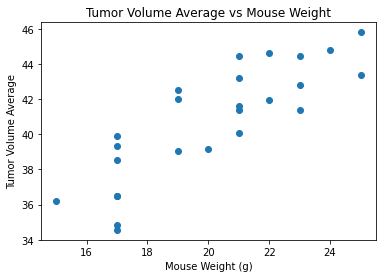

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse weight to find average tumor volume
IsoCapomulin = IsoCapomulin.reset_index()
avg_tumor_group = IsoCapomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_df = pd.DataFrame(avg_tumor_group)

# establish x-axis value for the weight of the mice
weight_group = IsoCapomulin.groupby(["Mouse ID"])["Weight (g)"].mean()
weight_df = pd.DataFrame(weight_group)
x_axis = weight_df["Weight (g)"]

# produce scatter plot of the data
plt.scatter(x=x_axis, y=avg_tumor_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume Average vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


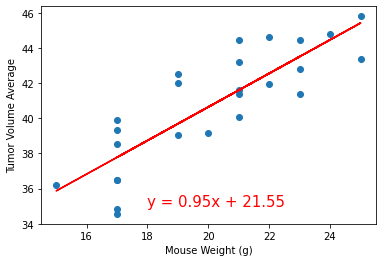

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
x = weight_df["Weight (g)"]
y = avg_tumor_df["Tumor Volume (mm3)"]

#print St. Pearson Correlation Coefficient
correlation = st.pearsonr(x,y)
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# establish linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# linear regression line 
plt.annotate(line_eq,(18,35),fontsize=15,color="red")

# scatter plot of the data
plt.scatter(x=x_axis, y=avg_tumor_df["Tumor Volume (mm3)"])
plt.plot(weight, wt_fit, "-", color="r")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.show()